In [47]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import streamlit

In [48]:
spam_data = pd.read_csv(r"C:\Users\Hp\Documents\Practice Dataset\spam.csv", encoding='latin-1')
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [49]:
spam_data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3133,ham,Ok going to sleep. Hope i can meet her.,NaN,NaN,NaN
4169,ham,"Mmmmmm ... I love you,so much, Ahmad ... I can...",NaN,NaN,NaN
165,ham,I place all ur points on e cultures module alr...,NaN,NaN,NaN
2249,spam,"Thanks for your ringtone order, ref number R83...",NaN,NaN,NaN
396,ham,Was actually sleeping and still might when u c...,NaN,NaN,NaN
2535,ham,Can you pls pls send me a mail on all you know...,NaN,NaN,NaN
3968,ham,Thanks for your message. I really appreciate y...,NaN,NaN,NaN
1864,ham,You call him now ok i said call him,NaN,NaN,NaN
2109,ham,Lara said she can loan me &lt;#&gt; .,NaN,NaN,NaN
3693,ham,Ok im not sure what time i finish tomorrow but...,NaN,NaN,NaN


# Exploratory Data Analysis

In [50]:
# check the details of the dataset
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [51]:
spam_data.shape

(5572, 5)

In [52]:
# dropping all the unnamed columns
spam_data = spam_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [53]:
# check the dataset again
spam_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
spam_data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [55]:
spam_data.isnull().sum()

v1    0
v2    0
dtype: int64

In [56]:
spam_data = spam_data.rename(columns={'v1':'target','v2':'emails'})
spam_data.head()

,target,emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
# check for duplicate values
spam_data.duplicated().sum()

403

In [58]:
spam_data = spam_data.drop_duplicates()
spam_data.head()

,target,emails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
spam_data.shape

(5169, 2)

In [60]:
# Total number of the different entries
spam_data['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
encoder = LabelEncoder()

In [63]:
# introduce the encoding process to the dataset
spam_data['target'] = encoder.fit_transform(spam_data['target'])

In [64]:
spam_data.head()

,target,emails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
# create a visual of this dataset
spam_data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

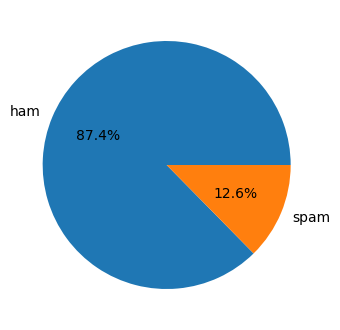

In [66]:
plt.figure(figsize=(4, 6))
plt.pie(spam_data['target'].value_counts(), labels=['ham','spam'], autopct='%0.1f%%')
plt.show()

In [67]:
# download the pre-trained tokenizer model
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [68]:
# create another column in the dateset that shows the number of characters
spam_data['num_character'] = spam_data['emails'].apply(len)

In [69]:
# to check if our new column is created
spam_data.head()

,target,emails,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [70]:
x = spam_data['emails'][0]
y = spam_data['target']

In [71]:
spam_data['emails'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: emails, Length: 5169, dtype: object

In [72]:
# num of words
spam_data['emails'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: emails, Length: 5169, dtype: int64

In [73]:
spam_data['num_of_words'] = spam_data['emails'].apply(lambda x:len(nltk.word_tokenize(x)))

In [74]:
spam_data.head()

,target,emails,num_character,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [75]:
# Sentence tokenization
spam_data['num_sentence'] = spam_data['emails'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [76]:
spam_data.head()

,target,emails,num_character,num_of_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [77]:
spam_data[spam_data['target'] == 0][['num_character', 'num_of_words', 'num_sentence']].describe()

,num_character,num_of_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


## Correlation

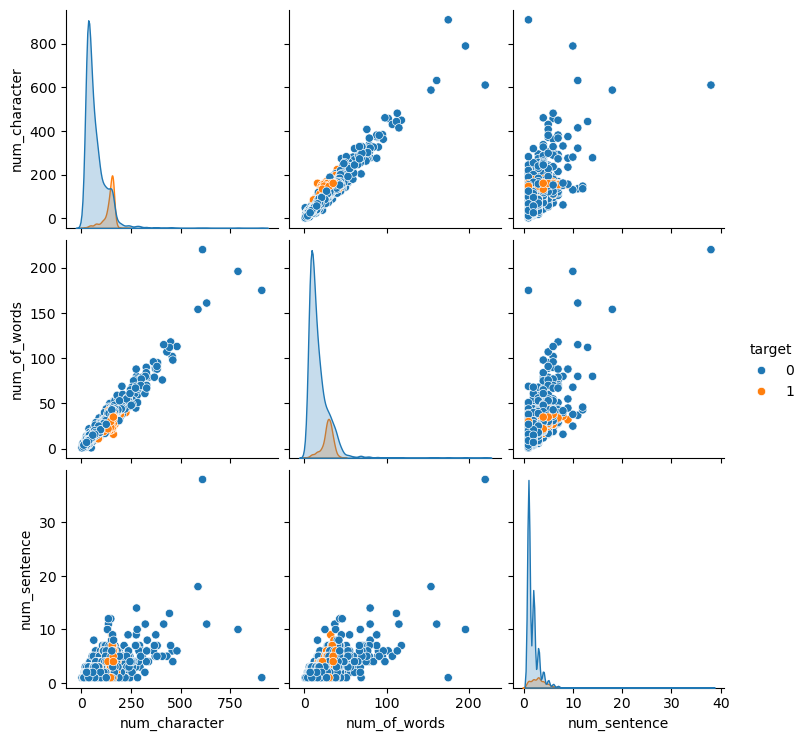

In [78]:
sns.pairplot(data=spam_data, hue='target')

<Axes: xlabel='num_character', ylabel='Count'>

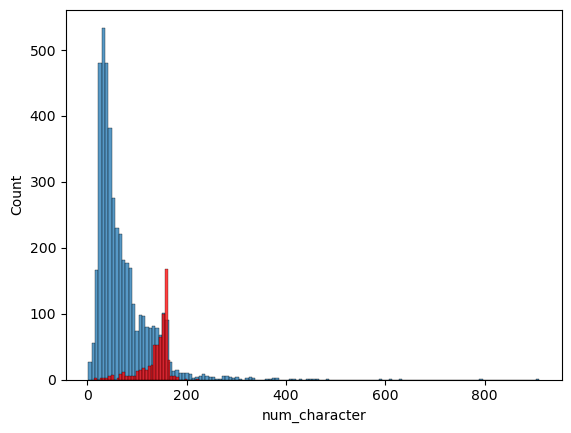

In [79]:
sns.histplot(spam_data[spam_data['target'] == 0]['num_character'])
sns.histplot(spam_data[spam_data['target'] == 1]['num_character'], color='red')

In [80]:
# correlation matrix
correlation = spam_data[['target', 'num_character', 'num_of_words', 'num_sentence']].corr()

In [81]:
correlation

,target,num_character,num_of_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_of_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

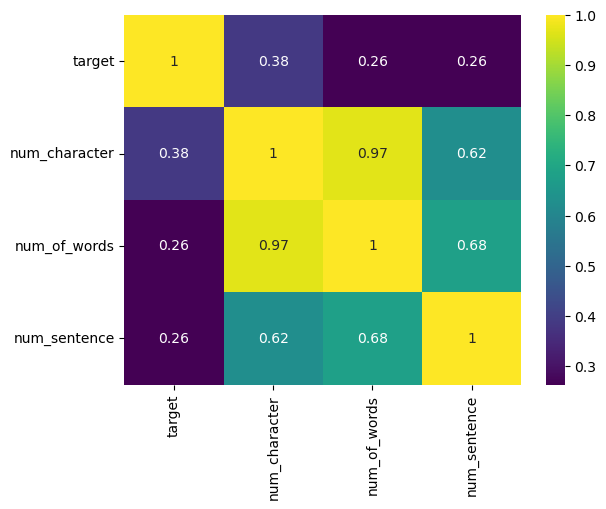

In [82]:
sns.heatmap(correlation, annot=True, cmap='viridis')

## Data Proccessing

* lowercase
* Tokenization
* Remove special characters
* Remove stop words and punctuation
* Stemming

In [83]:
punc = []
list_num = [1, 2, 3, 4, 5]
punc.append(list_num)

In [84]:
punc

[[1, 2, 3, 4, 5]]

In [85]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # loop for removing alpha-numericsl
    punc = []
    for i in text:
        if i.isalnum():
            punc.append(i)

    text=punc[:]
    punc.clear()

    #loop for removing stop words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            punc.append(i)

    return " ".join(punc)

In [86]:
transform_text('Hi Ebun, Did$ you enjoy the Machine%% learning Class?')

'hi ebun enjoy machine learning class'

In [87]:
# stop words in NLP
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [88]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
# stop words in NLP
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [90]:
transform_text('Hi Ebun, Did$ you enjoy the Machine%% learning Class?')

'hi ebun enjoy machine learning class'

In [91]:
spam_data['emails'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [92]:
spam_data['emails'].apply(transform_text)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u pound prize 2 claim...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: emails, Length: 5169, dtype: object

In [93]:
spam_data['transformed_text'] = spam_data['emails'].apply(transform_text)

In [94]:
# check if the tranformed column was added
spam_data.head()

,target,emails,num_character,num_of_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [95]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [96]:
from wordcloud import WordCloud

In [97]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [98]:
spam_wc = wc.generate(spam_data[spam_data['target'] == 1]['transformed_text'].str.cat(sep=' '))

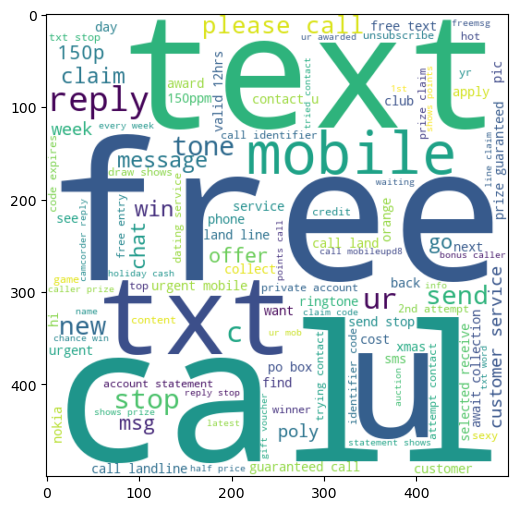

In [99]:
# display visual of wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('on')

plt.show()

In [100]:
spam_corpus = []
for msg in spam_data[spam_data['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [101]:
len(spam_corpus)

9939

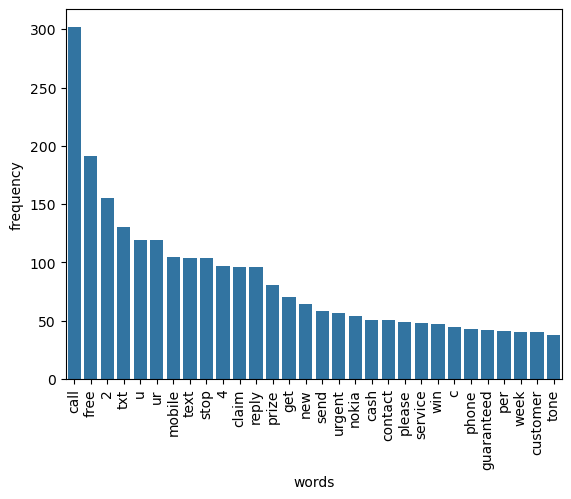

In [102]:
from collections import Counter # count is used to count or check the frequency
most_common = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['words', 'frequency'])
sns.barplot(x='words', y='frequency', data=most_common)
plt.xticks(rotation=90)
plt.show()

# Model Building

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [104]:
x = cv.fit_transform(spam_data['transformed_text']).toarray()

In [105]:
x.shape

(5169, 8002)

In [106]:
y = spam_data['target'].values

In [107]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Training and Testing 

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [111]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [112]:
spam_data.shape

(5169, 6)

In [113]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4135, 8002)
(1034, 8002)
(4135,)
(1034,)


In [114]:
gnb.fit(xtrain, ytrain)
y_pred = gnb.predict(xtest)
print(accuracy_score(ytest, y_pred))
print(confusion_matrix(ytest, y_pred))
print(precision_score(ytest, y_pred))

0.8858800773694391
[[789 100]
 [ 18 127]]
0.5594713656387665


In [115]:
mnb.fit(xtrain, ytrain)
y_pred = mnb.predict(xtest)
print(accuracy_score(ytest, y_pred))
print(confusion_matrix(ytest, y_pred))
print(precision_score(ytest, y_pred))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [116]:
bnb.fit(xtrain, ytrain)
y_pred = gnb.predict(xtest)
print(accuracy_score(ytest, y_pred))
print(confusion_matrix(ytest, y_pred))
print(precision_score(ytest, y_pred))

0.8858800773694391
[[789 100]
 [ 18 127]]
0.5594713656387665


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
svc = SVC(kernel ='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [119]:
clfs = {
    'SVC':svc,
    # 'KN': Knc,
    'MN': mnb,
    'DT': dtc,
    'RF': rfc,
    'LR': lrc,
    'BC': bc,
    'ETC': etc,
    'GBDT': gbdt
}

In [120]:
def train_classifier(clf, xtrain, xtest, ytrain, ytest):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)

    return accuracy, precision

In [121]:
train_classifier(rfc, xtrain, xtest, ytrain, ytest)

(0.9661508704061895, 0.9910714285714286)

In [122]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, xtrain, xtest, ytrain, ytest)

    print('for ', name)
    print('Accuracy -', current_accuracy)
    print('Precision -', current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  SVC
Accuracy - 0.9274661508704062
Precision - 0.7430555555555556
for  MN
Accuracy - 0.9738878143133463
Precision - 0.8881578947368421
for  DT
Accuracy - 0.9187620889748549
Precision - 0.9295774647887324
for  RF
Accuracy - 0.9661508704061895
Precision - 0.9910714285714286
for  LR
Accuracy - 0.9777562862669246
Precision - 0.9765625
for  BC
Accuracy - 0.9487427466150871
Precision - 0.8538461538461538
for  ETC
Accuracy - 0.9690522243713733
Precision - 0.9669421487603306
for  GBDT
Accuracy - 0.9381044487427466
Precision - 0.8932038834951457


In [123]:
# create a dataframe
performace_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})
performace_df

,Algorithm,Accuracy,Precision
0,SVC,0.927466,0.743056
1,MN,0.973888,0.888158
2,DT,0.918762,0.929577
3,RF,0.966151,0.991071
4,LR,0.977756,0.976562
5,BC,0.948743,0.853846
6,ETC,0.969052,0.966942
7,GBDT,0.938104,0.893204


In [124]:
performance_df1 = pd.melt(performace_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.927466
1,MN,Accuracy,0.973888
2,DT,Accuracy,0.918762
3,RF,Accuracy,0.966151
4,LR,Accuracy,0.977756
5,BC,Accuracy,0.948743
6,ETC,Accuracy,0.969052
7,GBDT,Accuracy,0.938104
8,SVC,Precision,0.743056
9,MN,Precision,0.888158


In [125]:
performance_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Algorithm  16 non-null     object 
 1   variable   16 non-null     object 
 2   value      16 non-null     float64
dtypes: float64(1), object(2)
memory usage: 516.0+ bytes


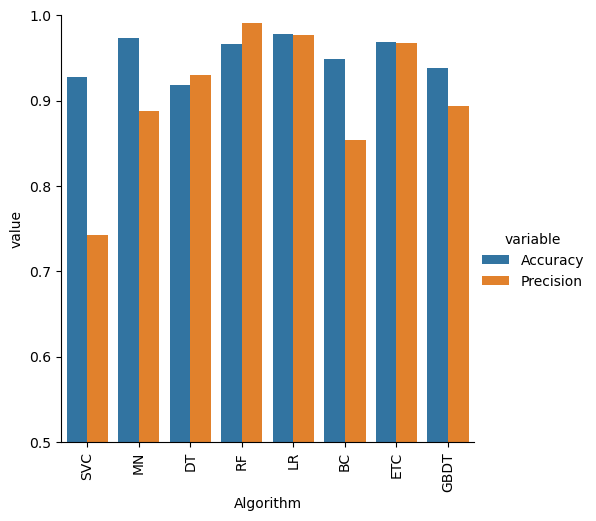

In [126]:
# catplot to visualize the performance of the algorithms
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.show()

In [127]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [128]:
# save your model

import pickle
with open('Logistic_model1.pkl', 'wb') as file:
    pickle.dump(clfs['LR'], file)

with open('cv_model1.pkl', 'wb') as file:
    pickle.dump(cv, file)